In [30]:
import csv
import os
import pathlib

import polars as pl
import plotnine as p9

from tools.sequence import Sequence

In [79]:
def _read_data():
    with open(pathlib.Path(os.getcwd()) / "gemorna" / "sequences.csv", "r") as f:
        sequences = pl.DataFrame(list(csv.DictReader(f)))
    with open(pathlib.Path(os.getcwd()) / "gemorna" / "cai.csv", "r") as f:
        cai = pl.DataFrame(list(csv.DictReader(f)))
    with open(pathlib.Path(os.getcwd()) / "gemorna" / "gc.csv", "r") as f:
        gc = pl.DataFrame(list(csv.DictReader(f)))
    with open(pathlib.Path(os.getcwd()) / "gemorna" / "normalized-mfe.csv", "r") as f:
        normalized_mfe = pl.DataFrame(list(csv.DictReader(f)))

    sequences = sequences.with_columns(
        natural_cai=cai["Natural"].cast(pl.Float64, strict=False),
        gemorna_cai=cai["GEMORNA"].cast(pl.Float64, strict=False),
        cai_cai=cai["CAI-optimized"].cast(pl.Float64, strict=False),
        lineardesign_cai=cai["LinearDesign (lambda=1)"].cast(pl.Float64, strict=False),
        random_cai=cai["Random"].cast(pl.Float64, strict=False),
        natural_gc=gc["Natural"].cast(pl.Float64, strict=False),
        gemorna_gc=gc["GEMORNA"].cast(pl.Float64, strict=False),
        cai_gc=gc["CAI-optimized"].cast(pl.Float64, strict=False),
        lineardesign_gc=gc["LinearDesign (lambda=1)"].cast(pl.Float64, strict=False),
        random_gc=gc["Random"].cast(pl.Float64, strict=False),
        natural_mfe=normalized_mfe["Natural"].cast(pl.Float64, strict=False),
        gemorna_mfe=normalized_mfe["GEMORNA"].cast(pl.Float64, strict=False),
        cai_mfe=normalized_mfe["CAI-optimized"].cast(pl.Float64, strict=False),
        lineardesign_mfe=normalized_mfe["LinearDesign (lambda=1)"].cast(
            pl.Float64, strict=False
        ),
        random_mfe=normalized_mfe["Random"].cast(pl.Float64, strict=False),
    )

    return sequences


df = _read_data()
df

Protein,Natural,GEMORNA,CAI-optimized,LinearDesign (lambda=1),Random,natural_cai,gemorna_cai,cai_cai,lineardesign_cai,random_cai,natural_gc,gemorna_gc,cai_gc,lineardesign_gc,random_gc,natural_mfe,gemorna_mfe,cai_mfe,lineardesign_mfe,random_mfe
str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""EVVMTQTPVSLPVTLGEPASISCKASQSLL…","""GAGGUUGUGAUGACGCAGACCCCAGUGUCC…","""GAGGUGGUGAUGACCCAGACCCCCGUGUCC…","""GAAGUGGUGAUGACCCAGACCCCAGUGUCU…","""GAGGUGGUGAUGACCCAGACCCCGGUGAGC…","""GAAGUGGUCAUGACGCAGACUCCAGUCUCA…",0.797512,0.973465,0.955536,0.833092,0.646915,0.538941,0.672897,0.619938,0.610592,0.489097,-0.338629,-0.378816,-0.349221,-0.665421,-0.268847
"""MRLSCPRAPGHGWMGLFLPHLPPSHNSSSG…","""AUGAGGCUAAGUUGCCCCAGAGCCCCAGGA…","""AUGAGGCUGAGCUGCCCCAGGGCCCCCGGC…","""AUGAGGCUGUCCUGCCCCCGGGCCCCCGGG…","""AUGCGGCUGAGCUGCCCCCGGGCACCCGGG…","""AUGCGUCUAUCGUGCCCCCGAGCACCAGGA…",0.75445,0.953052,0.939393,0.840986,0.678894,0.547425,0.707317,0.636856,0.666667,0.542005,-0.230894,-0.32168,-0.338211,-0.618699,-0.252304
"""MSNFYEERATMIAAGDLQEFVPFGRDHCKH…","""AUGUCGAACUUCUAUGAAGAAAGGGCAACG…","""AUGAGCAACUUCUACGAGGAGCGGGCCACC…","""AUGAGUAACUUCUACGAGGAAAGGGCCACC…","""AUGUCCAACUUUUAUGAGGAGCGCGCCACA…","""AUGAGCAAUUUUUACGAAGAGCGCGCCACG…",0.713309,0.982275,0.94313,0.841508,0.664779,0.463675,0.65812,0.604701,0.58547,0.489316,-0.285897,-0.423718,-0.39359,-0.651282,-0.276496
"""MPLAGLHLLAAKQAQFLSGPLPLVCSMGDG…","""AUGCCGCUGGCUGGACUGCACCUUCUGGCA…","""AUGCCCCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCUCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCCCUGGCAGGACUGCACCUGCUUGCC…","""AUGCCAUUGGCCGGACUACAUCUCCUAGCA…",0.76627,0.993115,0.952838,0.823718,0.655418,0.570175,0.69883,0.625731,0.634503,0.505848,-0.363158,-0.461111,-0.407018,-0.717836,-0.310819
"""MSSKMAISSDIGQARRAVEQLRMEAGIDRV…","""AUGUCCAGCAAGAUGGCCAUCAGCAGCGAC…","""AUGUCCAGCAAGAUGGCCAUCAGCAGCGAC…","""AUGAGCUCCAAGAUGGCCAUCUCCUCAGAC…","""AUGAGCAGCAAGAUGGCGAUCAGCUCCGAC…","""AUGUCCAGUAAAAUGGCAAUUUCGAGCGAC…",0.90584,0.947199,0.955897,0.845372,0.644204,0.648402,0.675799,0.625571,0.611872,0.484018,-0.384018,-0.413699,-0.344749,-0.608219,-0.23379
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""MRVLRVSQPLVRSFSSTGRSRFENRVAEKQ…","""AUGAGGGUCCUGCGGGUCUCCCAGCCCUUG…","""AUGAGGGUGCUGAGGGUGAGCCAGCCCCUG…","""AUGAGAGUGCUGAGGGUUUCCCAGCCCCUG…","""AUGCGGGUGCUGAGGGUGUCCCAGCCACUG…","""AUGCGAGUUUUACGAGUGUCCCAACCGCUG…",0.865745,0.992805,0.951486,0.88111,0.700334,0.596708,0.658436,0.588477,0.609053,0.502058,-0.347325,-0.397531,-0.385185,-0.651029,-0.295885
"""MARTKQTARKSTGGKAPRKQLATKAARKSA…","""AUGGCUCGUACUAAGCAGACCGCCCGCAAG…","""AUGGCGCGCACCAAGCAGACCGCCCGCAAG…","""AUGGCCCGGACCAAGCAGACAGCCAGAAAG…","""AUGGCGCGGACUAAGCAGACGGCCCGCAAG…","""AUGGCGAGAACUAAGCAGACAGCUAGAAAA…",0.836743,0.903241,0.950788,0.81584,0.673267,0.686131,0.708029,0.635036,0.656934,0.530414,-0.444769,-0.465693,-0.386618,-0.69562,-0.29562
"""MKIFYHFFHFLCCVTFILSATCSFVEPDRC…","""AUGAAGAUCUUUUACCACUUCUUCCAUUUU…","""AUGAAGAUCUUCUACCACUUCUUCCACUUC…","""AUGAAGAUCUUUUACCACUUCUUUCACUUC…","""AUGAAGAUCUUCUAUCAUUUCUUCCACUUC…","""AUGAAGAUCUUCUAUCAUUUCUUCCAUUUC…",0.755613,0.980307,0.953055,0.826619,0.757683,0.390476,0.604762,0.519048,0.52381,0.447619,-0.238095,-0.301905,-0.243333,-0.544762,-0.292381


In [80]:
df2 = (
    df.with_columns(
        natural_cai_2=pl.col("Natural").map_elements(
            lambda x: Sequence.from_string(x).codon_adaptation_index(),
            return_dtype=pl.Float64,
        ),
        gemorna_cai_2=pl.col("GEMORNA").map_elements(
            lambda x: Sequence.from_string(x).codon_adaptation_index(),
            return_dtype=pl.Float64,
        ),
        cai_cai_2=pl.col("CAI-optimized").map_elements(
            lambda x: Sequence.from_string(x).codon_adaptation_index(),
            return_dtype=pl.Float64,
        ),
        lineardesign_cai_2=pl.col("LinearDesign (lambda=1)").map_elements(
            lambda x: Sequence.from_string(x).codon_adaptation_index(),
            return_dtype=pl.Float64,
        ),
        random_cai_2=pl.col("Random").map_elements(
            lambda x: Sequence.from_string(x).codon_adaptation_index(),
            return_dtype=pl.Float64,
        ),
    )
    .with_columns(
        natural_cai_diff=pl.col("natural_cai") - pl.col("natural_cai_2"),
        gemorna_cai_diff=pl.col("gemorna_cai") - pl.col("gemorna_cai_2"),
        cai_cai_diff=pl.col("cai_cai") - pl.col("cai_cai_2"),
        lineardesign_cai_diff=pl.col("lineardesign_cai") - pl.col("lineardesign_cai_2"),
        random_cai_diff=pl.col("random_cai") - pl.col("random_cai_2"),
    )
    .with_row_index()
)
df2

index,Protein,Natural,GEMORNA,CAI-optimized,LinearDesign (lambda=1),Random,natural_cai,gemorna_cai,cai_cai,lineardesign_cai,random_cai,natural_gc,gemorna_gc,cai_gc,lineardesign_gc,random_gc,natural_mfe,gemorna_mfe,cai_mfe,lineardesign_mfe,random_mfe,natural_cai_2,gemorna_cai_2,cai_cai_2,lineardesign_cai_2,random_cai_2,natural_cai_diff,gemorna_cai_diff,cai_cai_diff,lineardesign_cai_diff,random_cai_diff
u32,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,"""EVVMTQTPVSLPVTLGEPASISCKASQSLL…","""GAGGUUGUGAUGACGCAGACCCCAGUGUCC…","""GAGGUGGUGAUGACCCAGACCCCCGUGUCC…","""GAAGUGGUGAUGACCCAGACCCCAGUGUCU…","""GAGGUGGUGAUGACCCAGACCCCGGUGAGC…","""GAAGUGGUCAUGACGCAGACUCCAGUCUCA…",0.797512,0.973465,0.955536,0.833092,0.646915,0.538941,0.672897,0.619938,0.610592,0.489097,-0.338629,-0.378816,-0.349221,-0.665421,-0.268847,0.807852,0.971588,0.959313,0.837784,0.658013,-0.01034,0.001877,-0.003777,-0.004692,-0.011098
1,"""MRLSCPRAPGHGWMGLFLPHLPPSHNSSSG…","""AUGAGGCUAAGUUGCCCCAGAGCCCCAGGA…","""AUGAGGCUGAGCUGCCCCAGGGCCCCCGGC…","""AUGAGGCUGUCCUGCCCCCGGGCCCCCGGG…","""AUGCGGCUGAGCUGCCCCCGGGCACCCGGG…","""AUGCGUCUAUCGUGCCCCCGAGCACCAGGA…",0.75445,0.953052,0.939393,0.840986,0.678894,0.547425,0.707317,0.636856,0.666667,0.542005,-0.230894,-0.32168,-0.338211,-0.618699,-0.252304,0.767743,0.952716,0.945908,0.842825,0.68947,-0.013293,0.000336,-0.006515,-0.001839,-0.010576
2,"""MSNFYEERATMIAAGDLQEFVPFGRDHCKH…","""AUGUCGAACUUCUAUGAAGAAAGGGCAACG…","""AUGAGCAACUUCUACGAGGAGCGGGCCACC…","""AUGAGUAACUUCUACGAGGAAAGGGCCACC…","""AUGUCCAACUUUUAUGAGGAGCGCGCCACA…","""AUGAGCAAUUUUUACGAAGAGCGCGCCACG…",0.713309,0.982275,0.94313,0.841508,0.664779,0.463675,0.65812,0.604701,0.58547,0.489316,-0.285897,-0.423718,-0.39359,-0.651282,-0.276496,0.724865,0.980575,0.945678,0.845681,0.672501,-0.011556,0.0017,-0.002549,-0.004174,-0.007722
3,"""MPLAGLHLLAAKQAQFLSGPLPLVCSMGDG…","""AUGCCGCUGGCUGGACUGCACCUUCUGGCA…","""AUGCCCCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCUCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCCCUGGCAGGACUGCACCUGCUUGCC…","""AUGCCAUUGGCCGGACUACAUCUCCUAGCA…",0.76627,0.993115,0.952838,0.823718,0.655418,0.570175,0.69883,0.625731,0.634503,0.505848,-0.363158,-0.461111,-0.407018,-0.717836,-0.310819,0.776227,0.989674,0.957162,0.822076,0.666494,-0.009957,0.003442,-0.004324,0.001642,-0.011076
4,"""MSSKMAISSDIGQARRAVEQLRMEAGIDRV…","""AUGUCCAGCAAGAUGGCCAUCAGCAGCGAC…","""AUGUCCAGCAAGAUGGCCAUCAGCAGCGAC…","""AUGAGCUCCAAGAUGGCCAUCUCCUCAGAC…","""AUGAGCAGCAAGAUGGCGAUCAGCUCCGAC…","""AUGUCCAGUAAAAUGGCAAUUUCGAGCGAC…",0.90584,0.947199,0.955897,0.845372,0.644204,0.648402,0.675799,0.625571,0.611872,0.484018,-0.384018,-0.413699,-0.344749,-0.608219,-0.23379,0.903204,0.942468,0.958309,0.846399,0.649212,0.002636,0.004731,-0.002412,-0.001028,-0.005008
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3760,"""MRVLRVSQPLVRSFSSTGRSRFENRVAEKQ…","""AUGAGGGUCCUGCGGGUCUCCCAGCCCUUG…","""AUGAGGGUGCUGAGGGUGAGCCAGCCCCUG…","""AUGAGAGUGCUGAGGGUUUCCCAGCCCCUG…","""AUGCGGGUGCUGAGGGUGUCCCAGCCACUG…","""AUGCGAGUUUUACGAGUGUCCCAACCGCUG…",0.865745,0.992805,0.951486,0.88111,0.700334,0.596708,0.658436,0.588477,0.609053,0.502058,-0.347325,-0.397531,-0.385185,-0.651029,-0.295885,0.868307,0.990003,0.958016,0.882788,0.706631,-0.002563,0.002802,-0.00653,-0.001678,-0.006297
3761,"""MARTKQTARKSTGGKAPRKQLATKAARKSA…","""AUGGCUCGUACUAAGCAGACCGCCCGCAAG…","""AUGGCGCGCACCAAGCAGACCGCCCGCAAG…","""AUGGCCCGGACCAAGCAGACAGCCAGAAAG…","""AUGGCGCGGACUAAGCAGACGGCCCGCAAG…","""AUGGCGAGAACUAAGCAGACAGCUAGAAAA…",0.836743,0.903241,0.950788,0.81584,0.673267,0.686131,0.708029,0.635036,0.656934,0.530414,-0.444769,-0.465693,-0.386618,-0.69562,-0.29562,0.828039,0.896037,0.953263,0.812974,0.681479,0.008704,0.007204,-0.002476,0.002865,-0.008212
3762,"""MKIFYHFFHFLCCVTFILSATCSFVEPDRC…","""AUGAAGAUCUUUUACCACUUCUUCCAUUUU…","""AUGAAGAUCUUCUACCACUUCUUCCACUUC…","""AUGAAGAUCUUUUACCACUUCUUUCACUUC…","""AUGAAGAUCUUCUAUCAUUUCUUCCACUUC…","""AUGAAGAUCUUCUAUCAUUUCUUCCAUUUC…",0.755613,0.980307,0.953055,0.826619

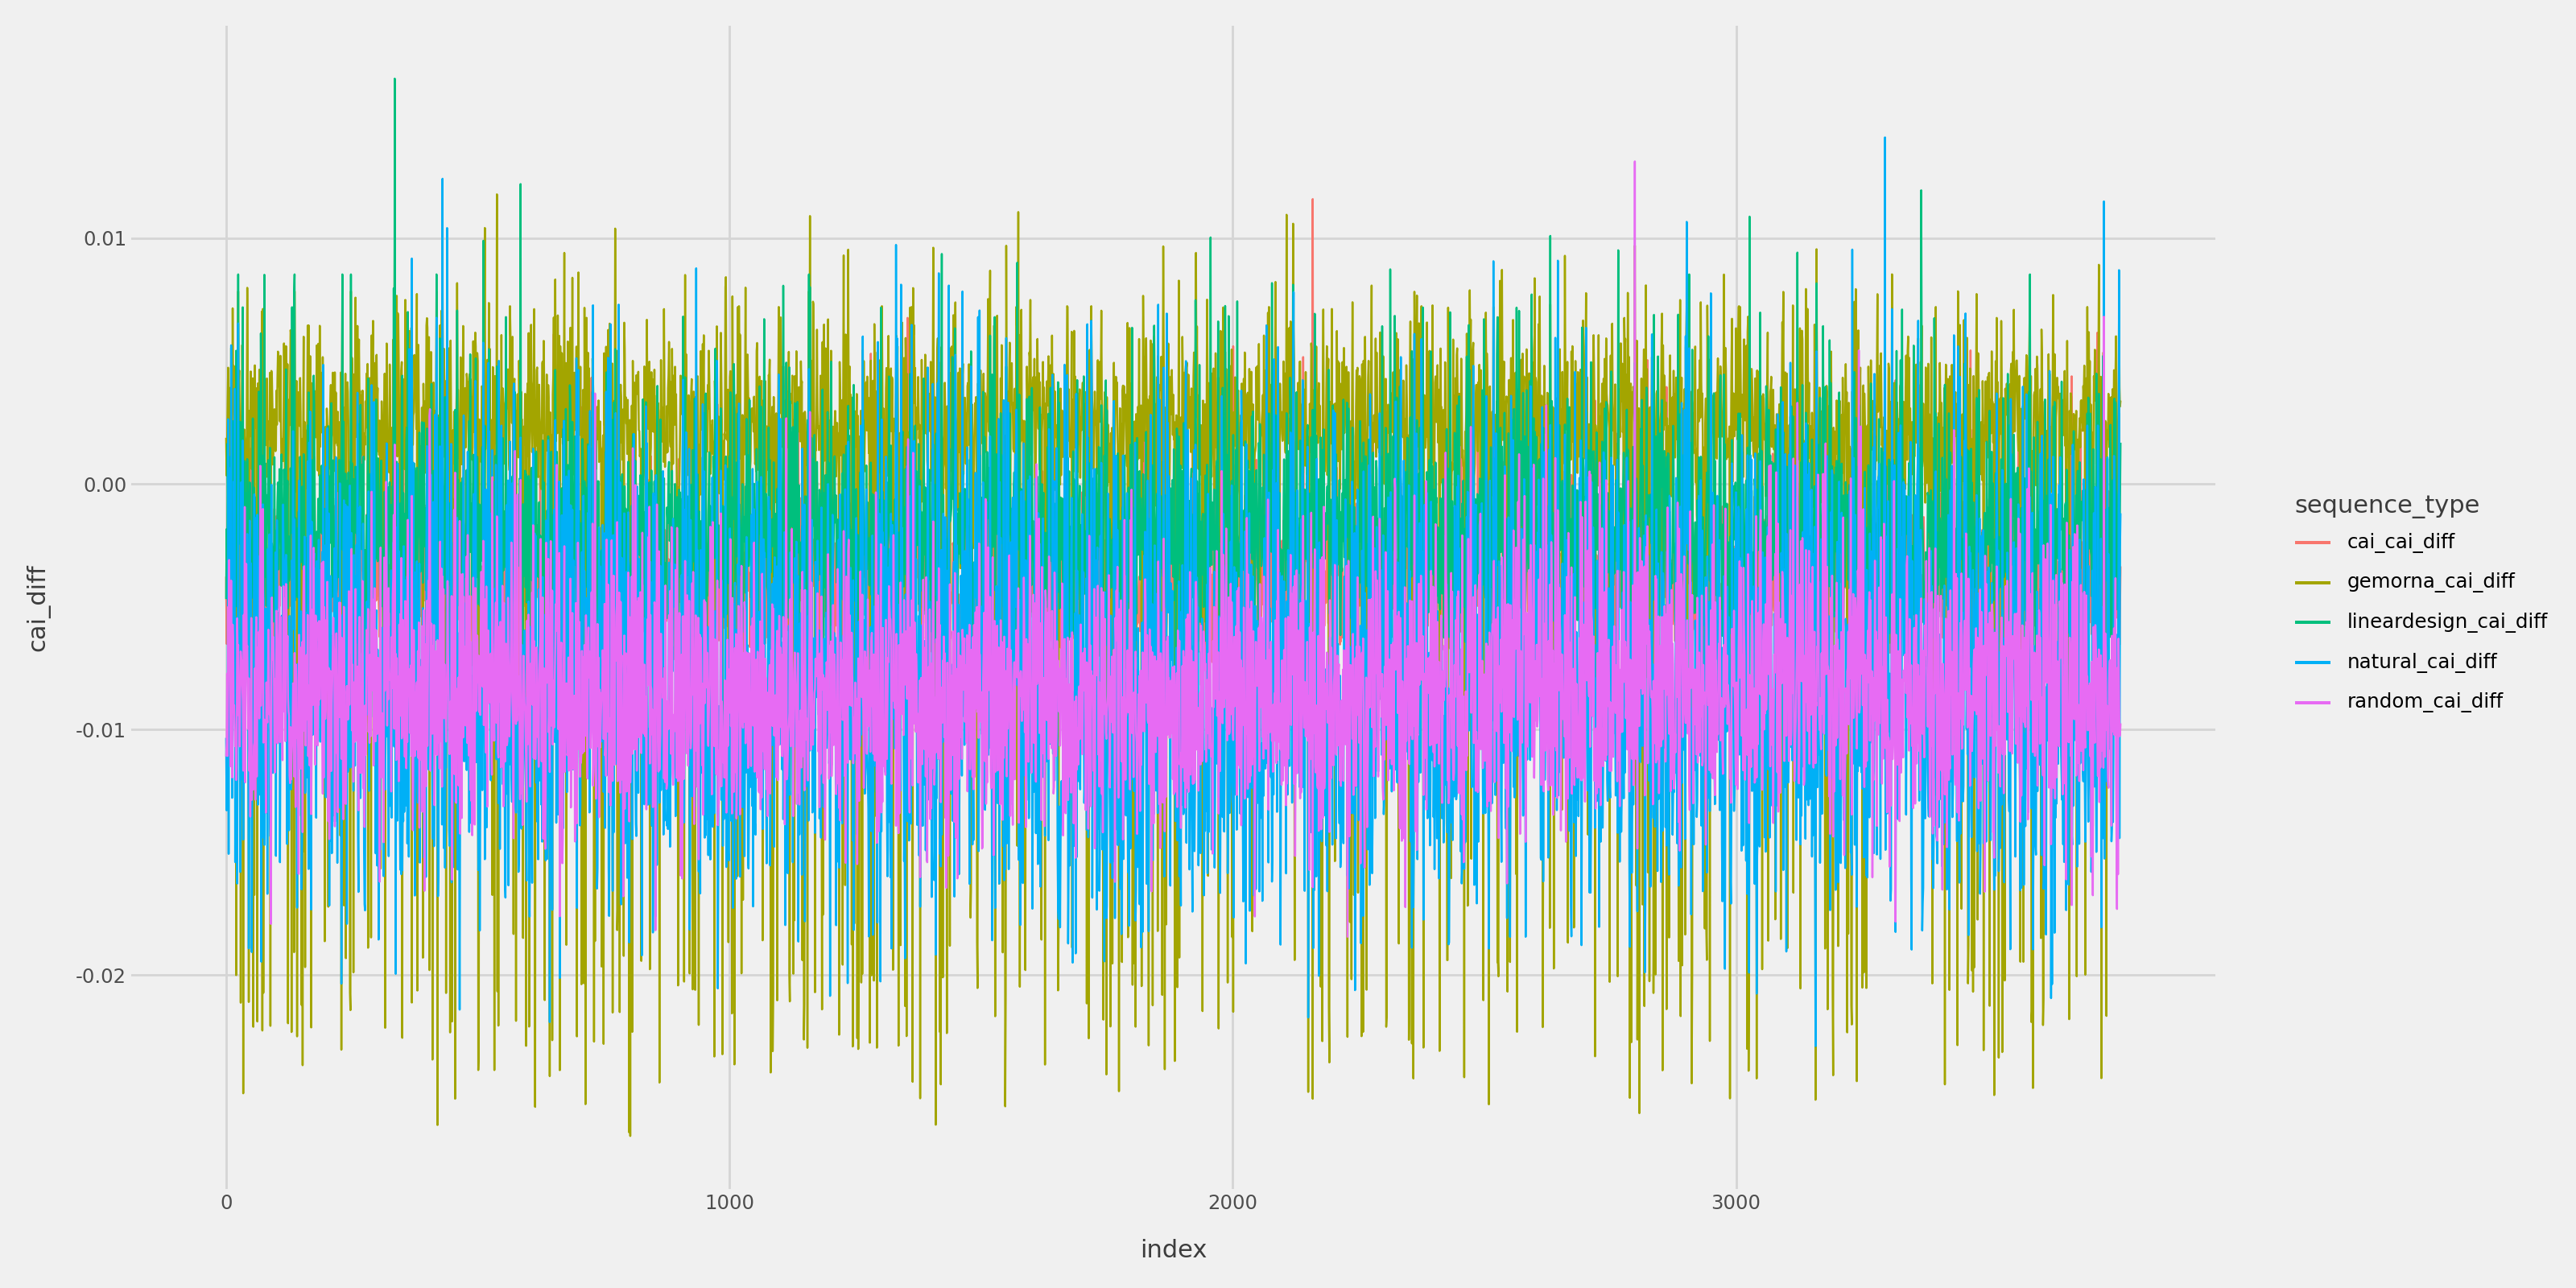

In [63]:
df3 = df2.unpivot(
    index="index",
    on=[
        "natural_cai_diff",
        "gemorna_cai_diff",
        "cai_cai_diff",
        "lineardesign_cai_diff",
        "random_cai_diff",
    ],
    # on=["gemorna_cai_diff", "cai_cai_diff", "lineardesign_cai_diff"],
    variable_name="sequence_type",
    value_name="cai_diff",
)

plot = (
    p9.ggplot(df3, p9.aes(x="index", y="cai_diff", color="sequence_type"))
    + p9.geom_line()
    # + p9.geom_smooth(span=0.01)
    # Styling
    # + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + p9.theme_538()
    + p9.theme(figure_size=(16, 8))
)
plot

In [74]:
df2.select(pl.mean("gemorna_cai_diff"), pl.mean("cai_cai_diff"))

gemorna_cai_diff,cai_cai_diff
f64,f64
0.00066,-0.003849


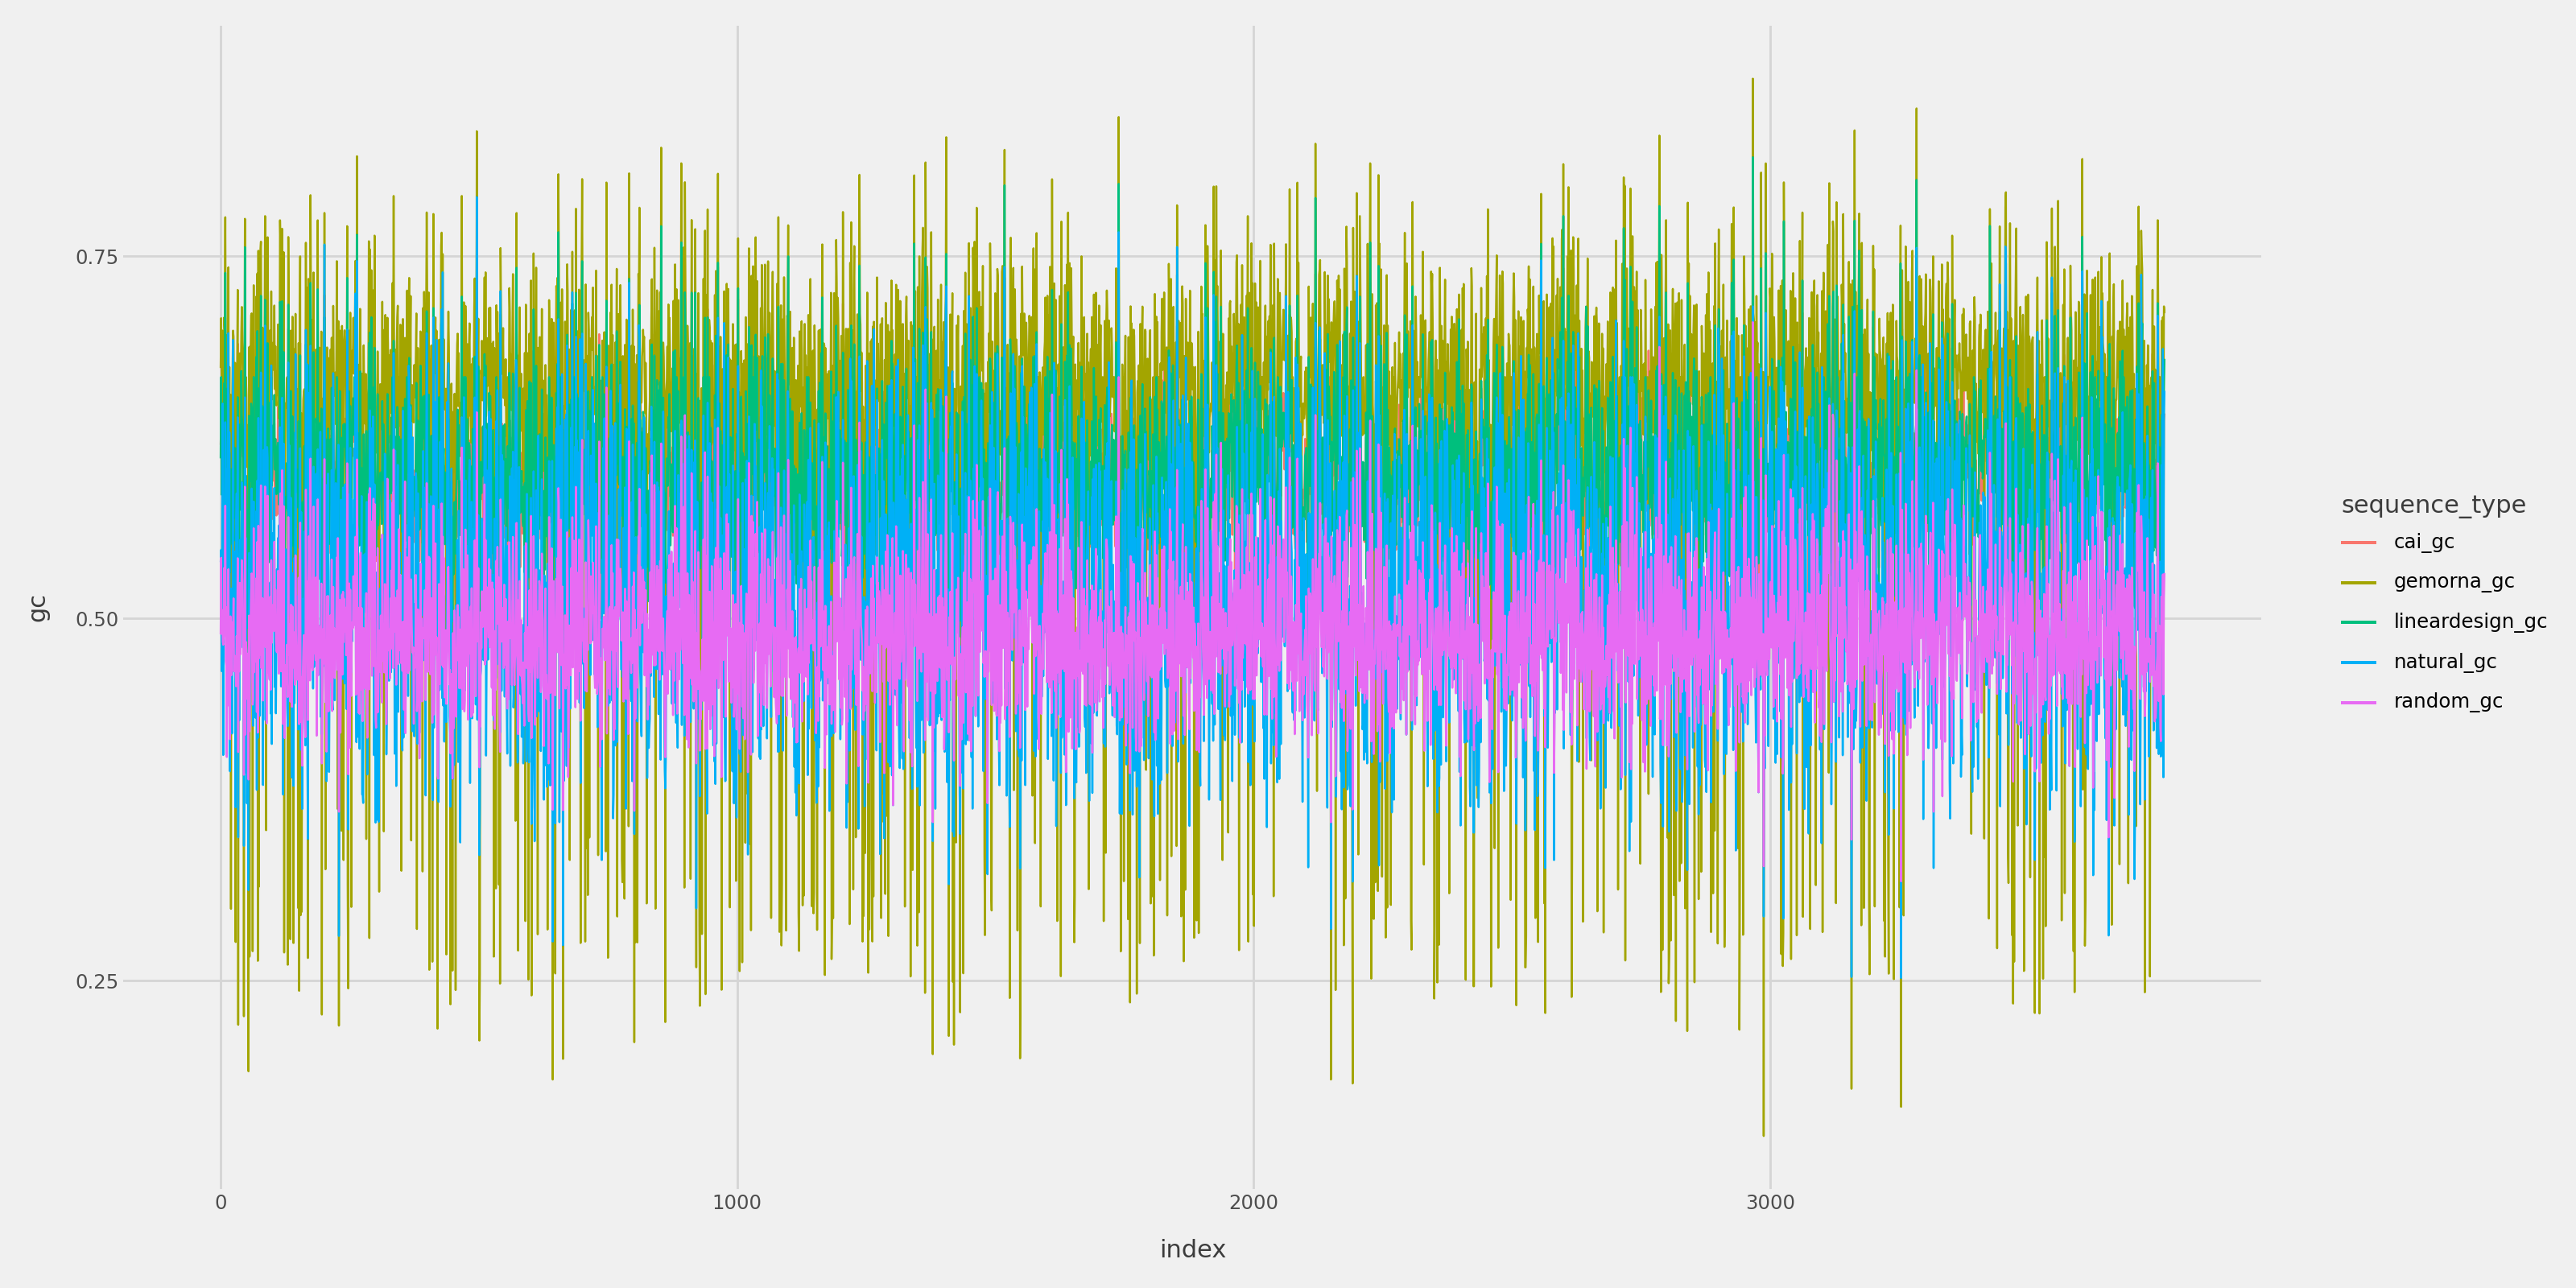

In [62]:
df_gc = df2.unpivot(
    index="index",
    on=["natural_gc", "gemorna_gc", "cai_gc", "lineardesign_gc", "random_gc"],
    # on=["gemorna_cai_diff", "cai_cai_diff", "lineardesign_cai_diff"],
    variable_name="sequence_type",
    value_name="gc",
)

df_gc.head()


plot_gc = (
    p9.ggplot(df_gc, p9.aes(x="index", y="gc", color="sequence_type"))
    + p9.geom_line()
    # + p9.geom_smooth(span=0.01)
    # Styling
    # + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + p9.theme_538()
    + p9.theme(figure_size=(16, 8))
)
plot_gc

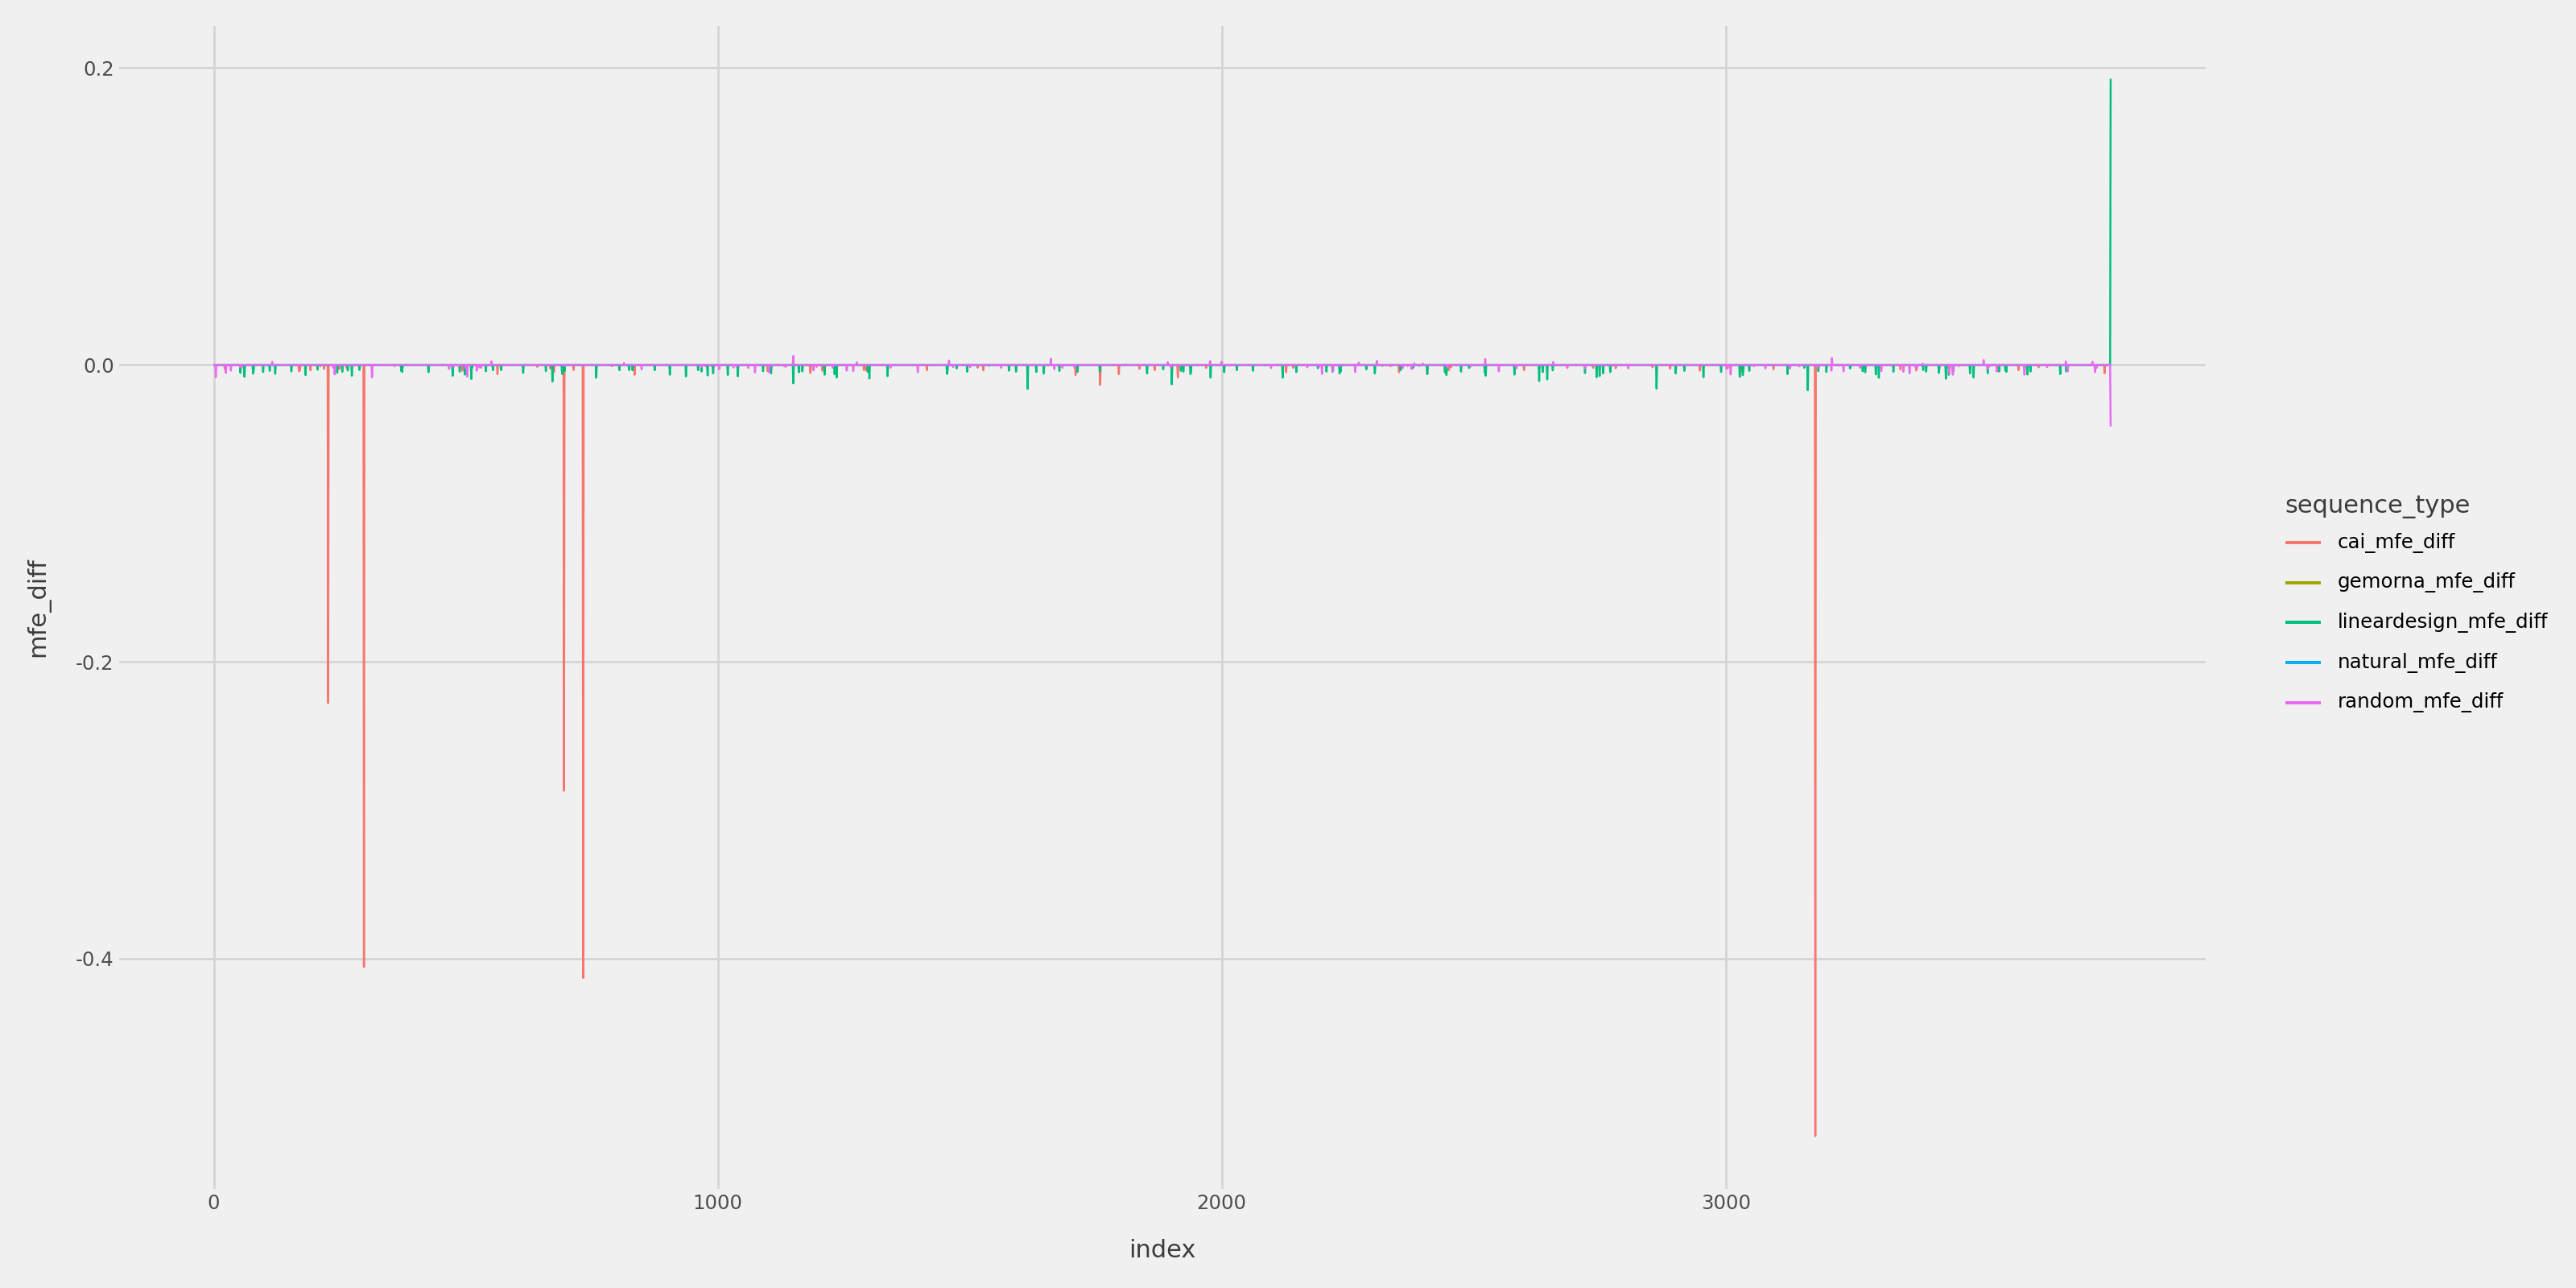

In [95]:
mfe_base = pl.read_csv(pathlib.Path(os.getcwd()) / "gemorna" / "mfe-base.csv")

df_mfe = (
    df2.with_columns(
        natural_mfe_2=mfe_base["natural_mfe_normalized"],
        gemorna_mfe_2=mfe_base["gemorna_mfe_normalized"],
        cai_mfe_2=mfe_base["cai_mfe_normalized"],
        lineardesign_mfe_2=mfe_base["lineardesign_mfe_normalized"],
        random_mfe_2=mfe_base["random_mfe_normalized"],
    )
    .with_columns(
        natural_mfe_diff=pl.col("natural_mfe") - pl.col("natural_mfe_2"),
        gemorna_mfe_diff=pl.col("gemorna_mfe") - pl.col("gemorna_mfe_2"),
        cai_mfe_diff=pl.col("cai_mfe") - pl.col("cai_mfe_2"),
        lineardesign_mfe_diff=pl.col("lineardesign_mfe") - pl.col("lineardesign_mfe_2"),
        random_mfe_diff=pl.col("random_mfe") - pl.col("random_mfe_2"),
    )
    .unpivot(
        index="index",
        on=[
            "natural_mfe_diff",
            "gemorna_mfe_diff",
            "cai_mfe_diff",
            "lineardesign_mfe_diff",
            "random_mfe_diff",
        ],
        # on=["gemorna_mfe_diff", "lineardesign_mfe_diff"],
        variable_name="sequence_type",
        value_name="mfe_diff",
    )
)

df_mfe.head()


plot_gc = (
    p9.ggplot(df_mfe, p9.aes(x="index", y="mfe_diff", color="sequence_type"))
    + p9.geom_line()
    + p9.theme_538()
    + p9.theme(figure_size=(16, 8))
)
plot_gc